#Preguntas a respodner
¿Cuál es la distribución del estado de conservación de las especies?
¿Es más probable que ciertos tipos de especies estén en peligro?
¿Son significativas las diferencias entre especies y su estado de conservación?
¿Qué animal es más frecuente y cuál es su distribución entre los parques?

In [7]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.rc('figure',figsize = (15,10))

In [2]:
df_species = pd.read_csv('species_info.csv')
df_species.head()

,category,scientific_name,common_names,conservation_status
0,Mammal,Clethrionomys gapperi gapperi,Gapper's Red-Backed Vole,NaN
1,Mammal,Bos bison,"American Bison, Bison",NaN
2,Mammal,Bos taurus,"Aurochs, Aurochs, Domestic Cattle (Feral), Dom...",NaN
3,Mammal,Ovis aries,"Domestic Sheep, Mouflon, Red Sheep, Sheep (Feral)",NaN
4,Mammal,Cervus elaphus,Wapiti Or Elk,NaN


In [3]:
df_species.fillna('Desconocido', inplace = True)
df_species.groupby("conservation_status").size()

conservation_status
Desconocido           5633
Endangered              16
In Recovery              4
Species of Concern     161
Threatened              10
dtype: int64

In [4]:
estatusCategoria =df_species[df_species.conservation_status != "Desconocido"]\
    .groupby(["category", "conservation_status"])['common_names']\
    .count()\
    .unstack()

estatusCategoria

conservation_status,Endangered,In Recovery,Species of Concern,Threatened
category,,,,
Amphibian,1.0,NaN,4.0,2.0
Bird,4.0,3.0,72.0,NaN
Fish,3.0,NaN,4.0,4.0
Mammal,7.0,1.0,28.0,2.0
Nonvascular Plant,NaN,NaN,5.0,NaN
Reptile,NaN,NaN,5.0,NaN
Vascular Plant,1.0,NaN,43.0,2.0


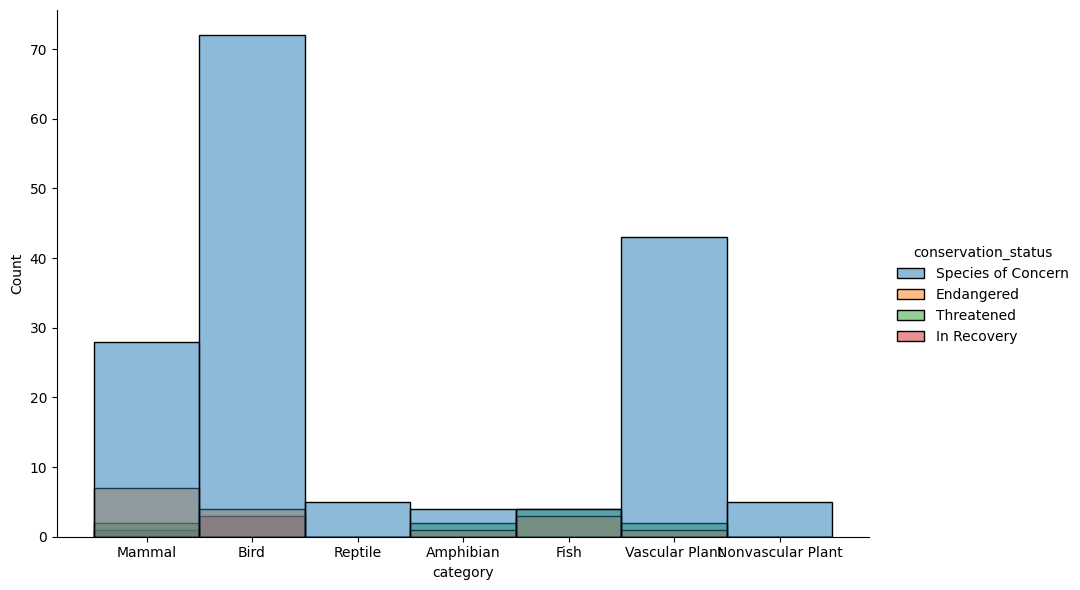

<Figure size 1000x600 with 0 Axes>

,category,scientific_name,common_names,conservation_status
7,Mammal,Canis latrans,Coyote,Species of Concern
8,Mammal,Canis lupus,Gray Wolf,Endangered
9,Mammal,Canis rufus,Red Wolf,Endangered
29,Mammal,Eptesicus fuscus,Big Brown Bat,Species of Concern
30,Mammal,Lasionycteris noctivagans,Silver-Haired Bat,Species of Concern
...,...,...,...,...
5302,Vascular Plant,Callitriche marginata,Winged Water-Starwort,Species of Concern
5399,Vascular Plant,Camissonia sierrae ssp. alticola,"Mono Hot Springs Evening Primrose, Mono Hot Sp...",Species of Concern
5426,Vascular Plant,Epilobium oreganum,"Grants Pass Willowherb, Oregon Fireweed",Species of Concern
5436,Vascular Plant,Botrychium ascendens,"Trianglelobe Moonwort, Upswept Moonwort",Species of Concern


In [10]:
# Filtrar el DataFrame para excluir los valores de 'Desconocido' en el estado de conservación
df_statusV = df_species[df_species['conservation_status'] != 'Desconocido']

sns.displot(data=df_statusV, x='category', hue='conservation_status', height=6, aspect=1.5)

# Configurar el tamaño de la figura
plt.figure(figsize=(10, 6))

# Mostrar el gráfico
plt.show()
df_statusV